In [1]:
import glob

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

from helpers_data import load_data, thresholds
threshold = thresholds['gong']

In [2]:
all_data = {}
for rss in ['15', '20', '25', '30']:
    files = sorted(glob.glob(f'/Volumes/Work/open_fline_results/gong/{rss}/*.npz'))
    print(len(files))
    all_data[rss] = load_data(files)

190
190
190
190


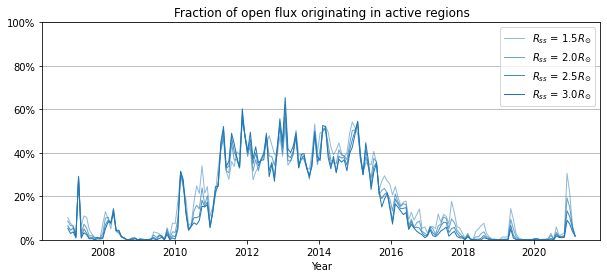

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
for rss, data in all_data.items():
    b_feet = np.abs(data.loc['b_feet'])
    b_ss = np.abs(data.loc['b_ss'])
    # Calculate flux
    allflux = np.sum(b_ss, axis=1)
    ar_flux = np.sum((b_feet > threshold) * b_ss, axis=1)
    # Plot flux
    ax.plot(ar_flux.coords['time'],
            ar_flux.values / allflux.values,
            label='$R_{ss}$ = ' + str(int(rss) / 10) + '$R_{\odot}$', lw=1,
            alpha=float(rss) / 30, color='tab:blue')

ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel('Year')
ax.yaxis.grid()
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
ax.set_title('Fraction of open flux originating in active regions')
fig.savefig('figs/varying_rss.pdf', bbox_inches='tight')